### prophet model from facebook to be used in time series analysis

In [41]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr



In [77]:
# import the dataset 
# df = pd.read_csv("./datasets/DailyDelhiClimateTrain.csv", index_col="date", parse_dates=True)
df = pd.read_csv("./datasets/DailyDelhiClimateTrain.csv")

# getting general information
print(df.head())
print(df.info())
print(df.describe())


         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209 

<AxesSubplot:xlabel='date', ylabel='meantemp'>

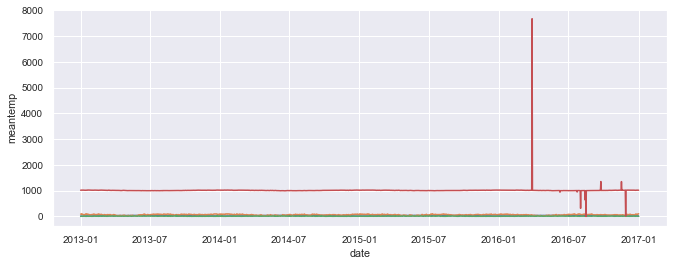

In [51]:
# line plot 
sns.set(rc={'figure.figsize':(11,4)}, font_scale = 0.9, style='darkgrid')
sns.lineplot(data=df, x="date", y = "meantemp")
sns.lineplot(data=df, x="date", y = "humidity")
sns.lineplot(data=df, x="date", y = "wind_speed")
sns.lineplot(data=df, x="date", y = "meanpressure")

In [44]:
# same plot on plotly
fig = px.line(df,x=df.index, y="meantemp", title="Mean Temperature")
fig.show()

In [55]:
# meanpressure on plotly
fig = px.line(df,x=df.index, y="meanpressure", title="Mean Pressure")
fig.show()

In [56]:
# interpolate the outliers from mean pressure column 
df.loc['2016-03-28', 'meanpressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(method='time')
df.loc['2016-03-28']


meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [58]:
# plotting after interpolation 
# meanpressure on plotly
fig = px.line(df,x=df.index, y="meanpressure", title="Mean Pressure")
fig.show()

In [45]:
# scatter plot between meantemp and humidity
fig = px.scatter(df, x="meantemp", y="humidity", title="Mean Temp vs Humidity",trendline="ols", trendline_color_override="red")
fig.show()

In [46]:
corr,_ =pearsonr(df['meantemp'],df['humidity'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.572


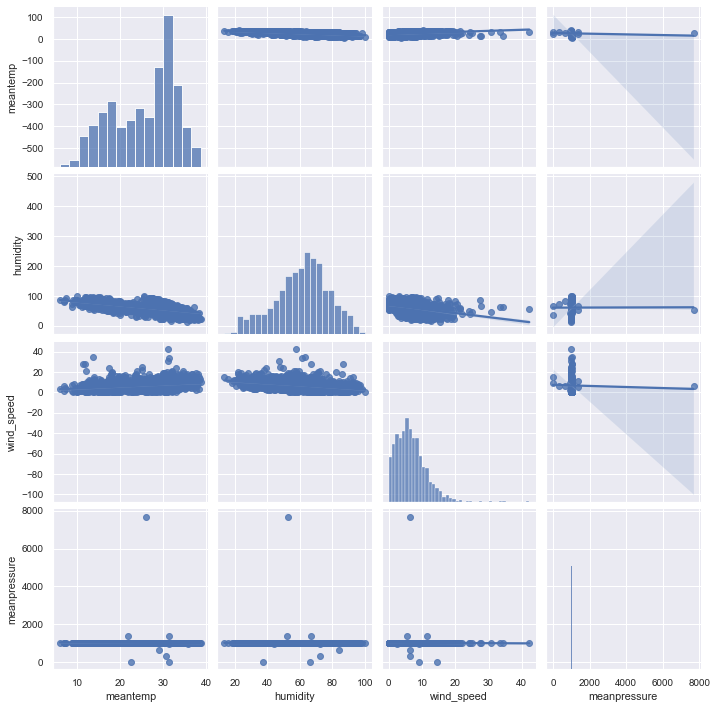

In [47]:
sns.pairplot(df, kind= "reg")

<AxesSubplot:>

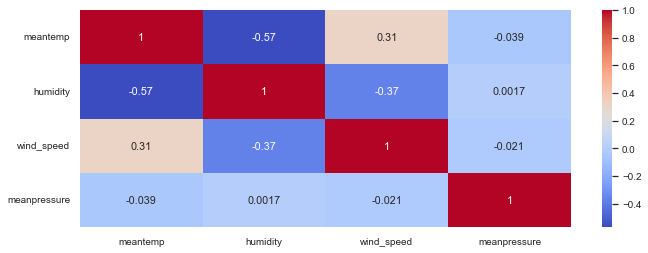

In [48]:
# heatmap of correlation
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

In [52]:
# scaling the data 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler() 
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index = df.index)
df_scaled.describe()


,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.336520e-17,2.174883e-16,-2.262972e-16,-5.719106e-16
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-5.628829e+00
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-5.286224e-02
50%,3.020541e-01,1.105528e-01,-1.273107e-01,-1.410365e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,2.131517e-02
max,1.799551e+00,2.340044e+00,7.766988e+00,3.701076e+01


<AxesSubplot:xlabel='date', ylabel='meantemp'>

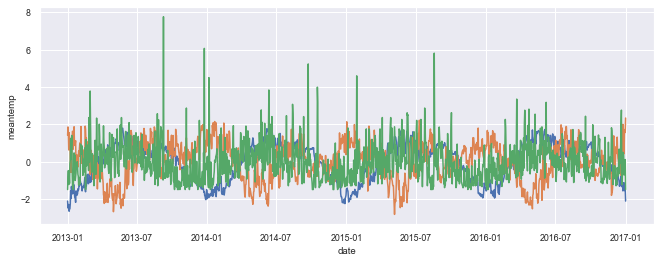

In [60]:
# drawing line plot on scaled data 
sns.set(rc={'figure.figsize':(11,4)}, font_scale = 0.8, style='darkgrid')
sns.lineplot(data=df_scaled, x="date", y = "meantemp")
sns.lineplot(data=df_scaled, x="date", y = "humidity")
sns.lineplot(data=df_scaled, x="date", y = "wind_speed")
# sns.lineplot(data=df_scaled, x="date", y = "meanpressure")

In [62]:
# added two columns in scaled dataset for month and year
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.037162,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.041972,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.033647,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.029946,1,2013


<AxesSubplot:xlabel='month', ylabel='meantemp'>

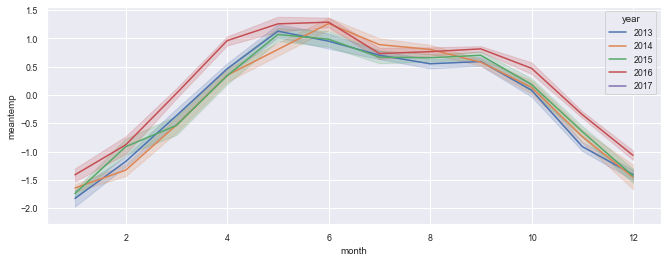

In [65]:
sns.lineplot(data=df_scaled, x="month", y="meantemp", hue="year", palette="deep")

In [68]:
# same in plotly
fig = px.line(df_scaled, x = df_scaled.index, y="meantemp", color = "year", title = "Mean Temperature by year")
fig.show()

In [69]:
# added two columns in dataset for month and year
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


In [70]:
# same in plotly
fig = px.line(df, x = df.index, y="meantemp", color = "year", title = "Mean Temperature by year")
fig.show()

### using the prophet model

In [78]:
df.head() # bringing date back as a column from index 

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [79]:
# renaming the columns 
df = df.rename(columns={'date':'ds', 'meantemp': 'y'})
df.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [85]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# calling the model 
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

plot_plotly(model, forecast)




01:52:45 - cmdstanpy - INFO - Chain [1] start processing
01:52:45 - cmdstanpy - INFO - Chain [1] done processing


In [87]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.699792,9.099314,14.217754,24.699792,24.699792,-12.940119,-12.940119,-12.940119,0.034055,0.034055,0.034055,-12.974174,-12.974174,-12.974174,0.0,0.0,0.0,11.759672
1,2013-01-02,24.699907,9.248534,14.517247,24.699907,24.699907,-12.804543,-12.804543,-12.804543,0.146272,0.146272,0.146272,-12.950815,-12.950815,-12.950815,0.0,0.0,0.0,11.895364
2,2013-01-03,24.700022,9.133152,14.365917,24.700022,24.700022,-12.845056,-12.845056,-12.845056,0.067157,0.067157,0.067157,-12.912213,-12.912213,-12.912213,0.0,0.0,0.0,11.854966
3,2013-01-04,24.700137,9.406771,14.352322,24.700137,24.700137,-12.832786,-12.832786,-12.832786,0.027526,0.027526,0.027526,-12.860312,-12.860312,-12.860312,0.0,0.0,0.0,11.867351
4,2013-01-05,24.700252,9.368356,14.514565,24.700252,24.700252,-12.866239,-12.866239,-12.866239,-0.069136,-0.069136,-0.069136,-12.797103,-12.797103,-12.797103,0.0,0.0,0.0,11.834014
